In [15]:
import h5py
import os
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import matplotlib.patches as patches
sns.set_style('darkgrid')
import pickle
from matplotlib import gridspec
from matplotlib.lines import Line2D
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
sns.set_context("poster", rc={"font.size":18,"axes.titlesize":18,"axes.labelsize":18}) 
import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [18]:
os.chdir('/Users/trongnguyen/Dropbox/FattyLiver/src/hydrogen/')

In [19]:
os.chdir('/Users/trongnguyen/Dropbox/FattyLiver/src/hydrogen/')
from helper_brl.outlierDetection import getBSC_Att, envDetection, filter_BSC_based_on_depth, findOutliers

In [20]:
from helper_brl import fattyLiver

In [21]:
from helper_brl.visualizeHelper import extract_segment_points

In [22]:
newdataBase = pd.read_excel('/Users/trongnguyen/Dropbox/FattyLiver/Rabbit_Liver_40.xlsx', sheet_name=0)
aliveOnly = newdataBase[newdataBase['Timely death'] == 1][['Rabbit', 'Weeks on diet', 'Lipid', 'Injection level']]
dataBase = aliveOnly.dropna()
dataBase = dataBase[['Rabbit', 'Injection level', 'Weeks on diet','Lipid']]

In [23]:
threshold_lipid = 11
dataBase['High_fat'] = dataBase.Lipid > threshold_lipid
dataBase = dataBase.sort_values(['Lipid'])
dataBase.index = range(1, len(dataBase)+1)
# Sep 14 2018 06:52 PM

In [10]:
%qtconsole

In [30]:
ATTs_dict, freq_att_dict, freq_bsc_dict, depth_dict, BSCs_dict = {}, {}, {}, {}, {} 
left_dict, right_dict, top_dict, bottom_dict = {}, {}, {}, {} # ROIs of each BSC
att_bottom, bad_BSC = {}, {}
name_tag = 'fix_bug_average_ref_phantom_3_6MHz_v8_10a40_30b'

number = str(int(751))
print(number, end = ', ')
path = "/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L" + number + "/L94_right/BSC_ATT/"
ATTs_dict[number], freq_att_dict[number], BSCs_dict[number], freq_bsc_dict[number], \
depth_dict[number], left_dict[number], right_dict[number], \
top_dict[number], bottom_dict[number], att_bottom[number], bad_BSC[number] = getBSC_Att(path,name_tag)

751, 

# Loading RF data 

In [18]:
%qtconsole

In [25]:
sns.set_style('white')

In [26]:
rf_path = '/Volumes/TrongDrive/Liver_Study/RF_hdf5/'

In [27]:
hf = h5py.File(rf_path + number + '.h5', 'r')
gp = hf.get('L94/Left')
image = np.array(gp.get(str(2)))
hf.close()

In [28]:
fs = 40e6 * 1.0
speedOfSound = 1540.0
lateralDistance = 38
lineLength  = image.shape[0]
axialDistance = lineLength * speedOfSound/2 / fs * 1000
extent = [0, lateralDistance, 0, axialDistance]

# Load reference phantom

In [34]:
path

'/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_left/segment_points/'

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


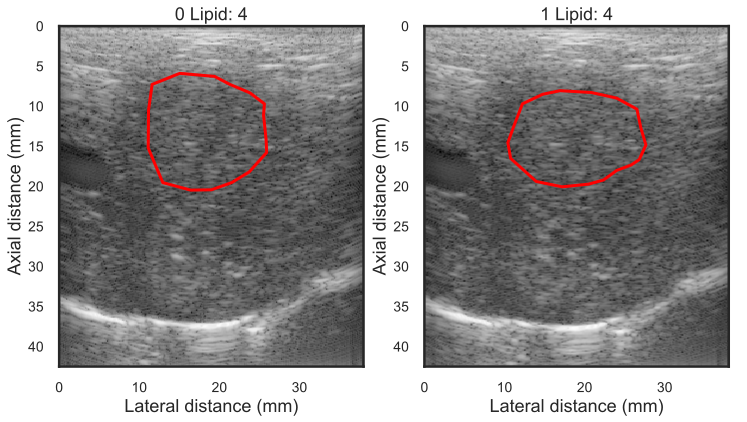

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


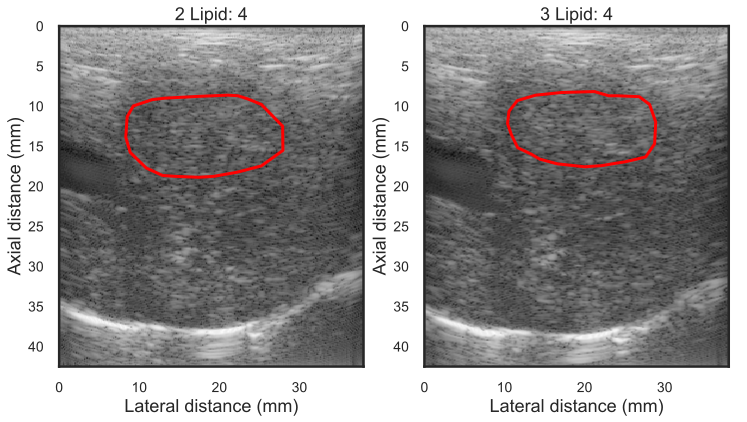

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


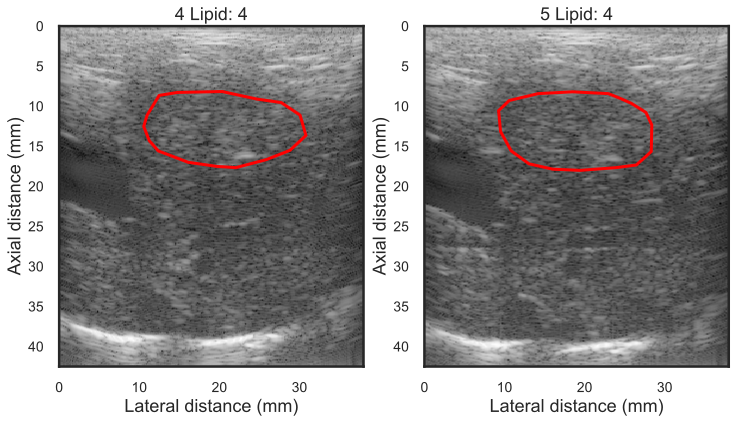

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


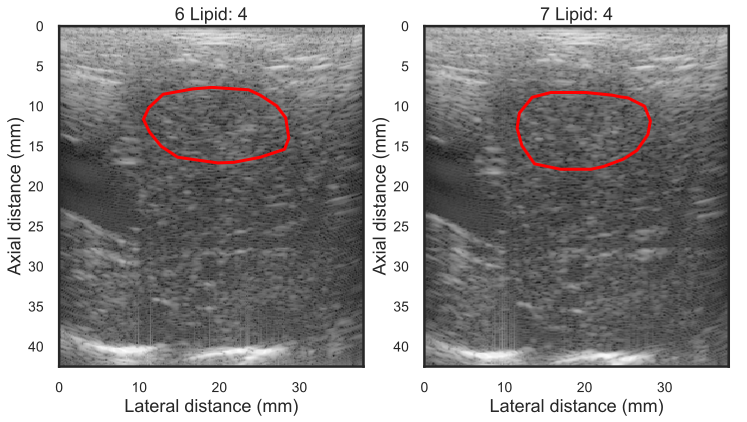

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


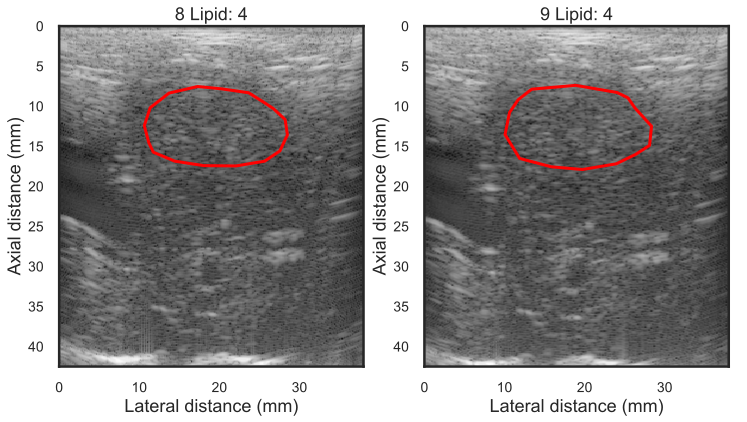

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


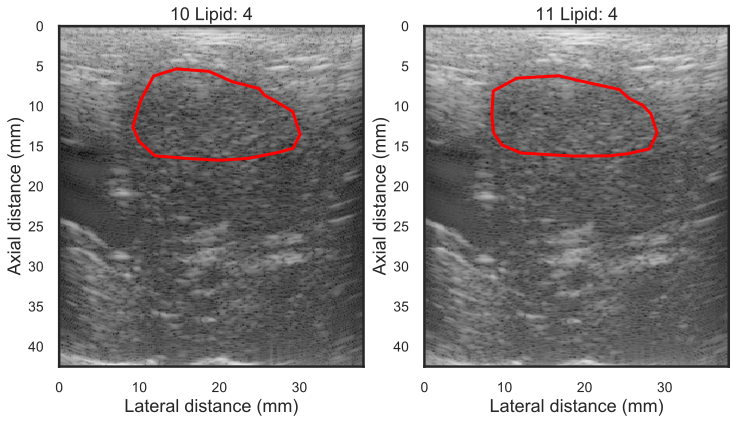

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


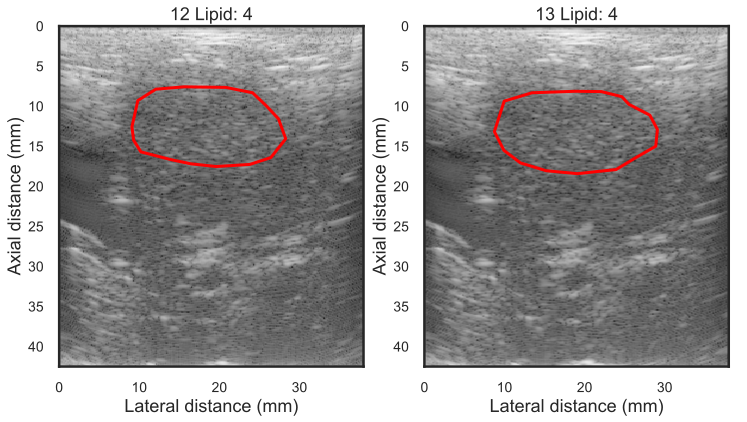

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


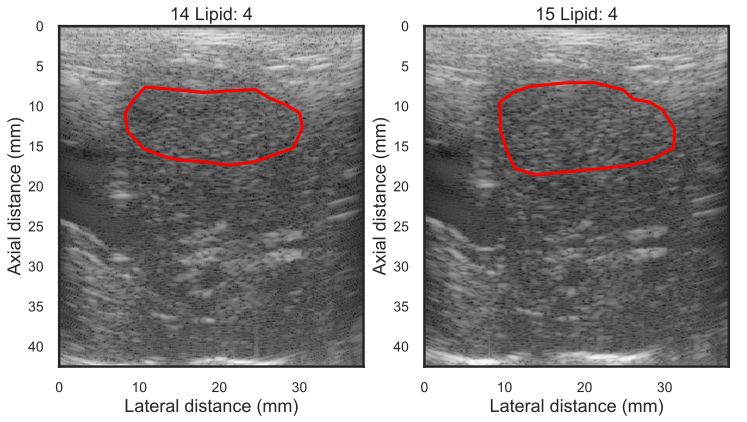

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


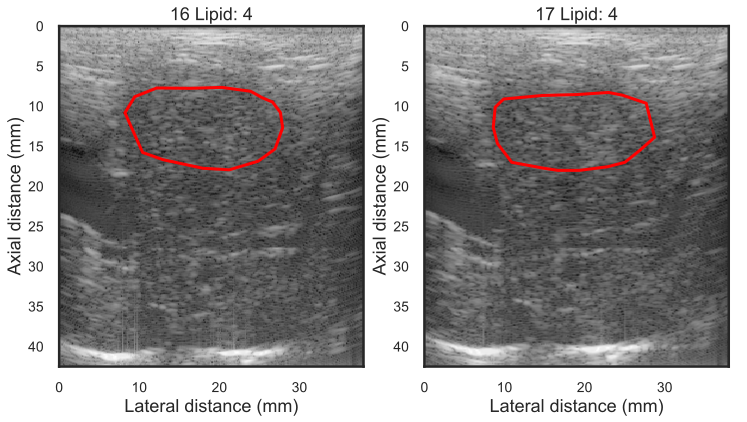

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


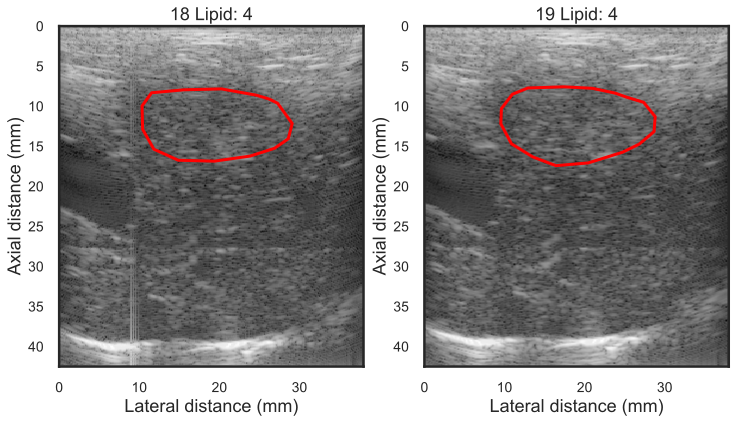

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


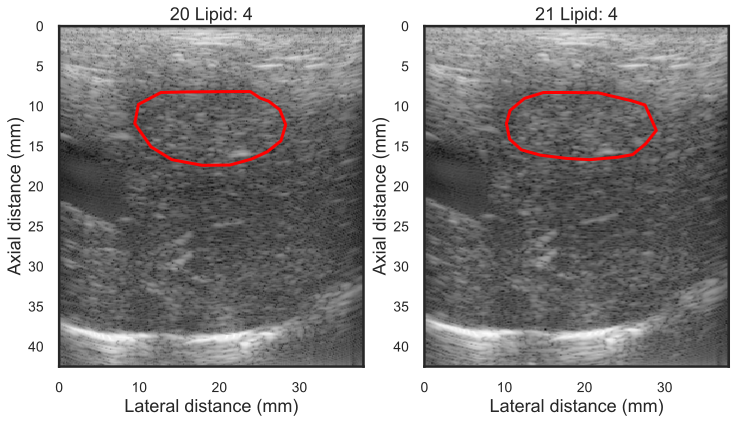

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


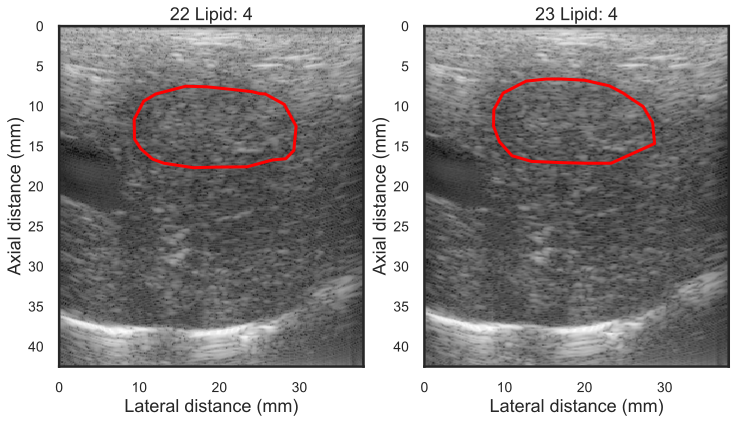

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


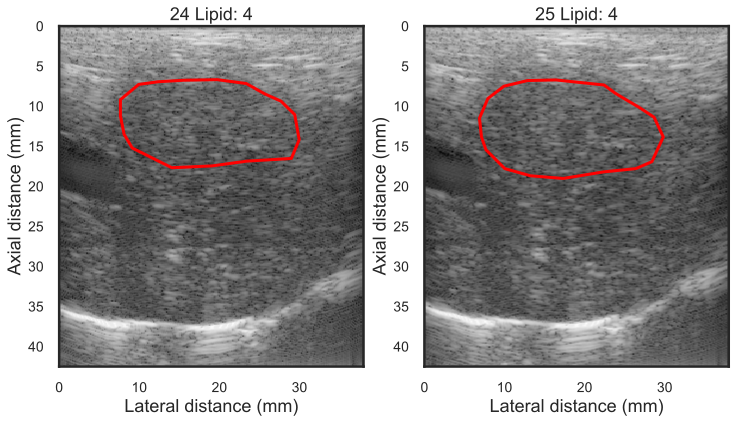

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


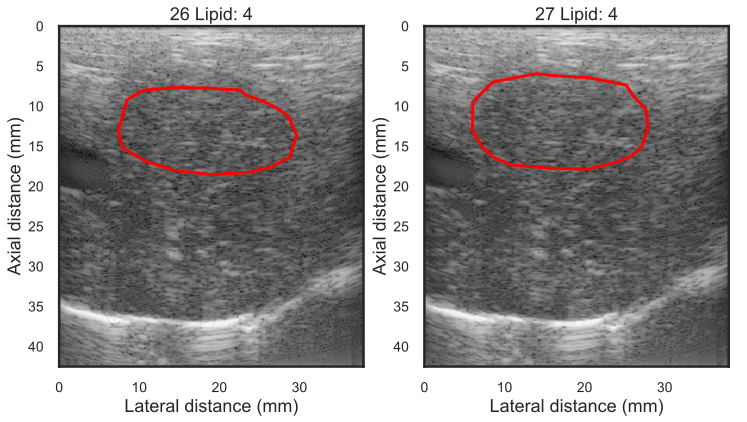

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


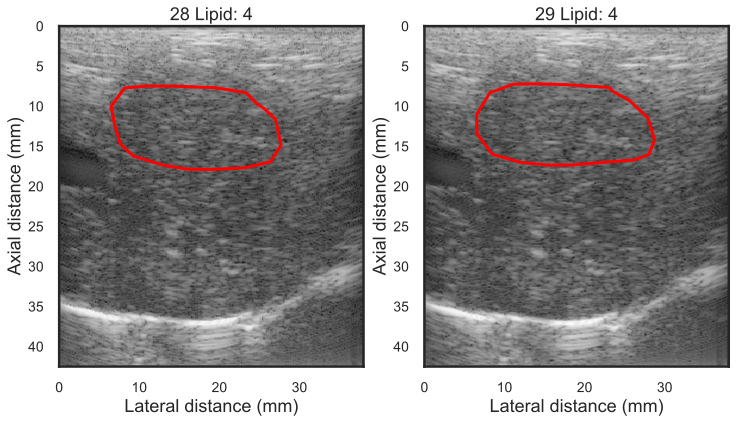

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


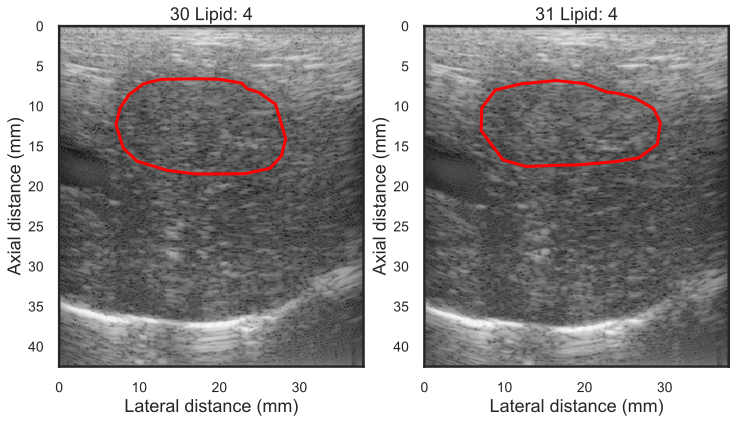

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


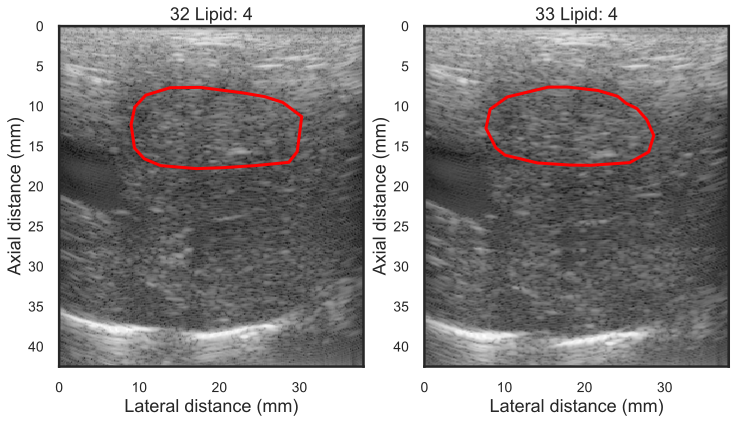

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


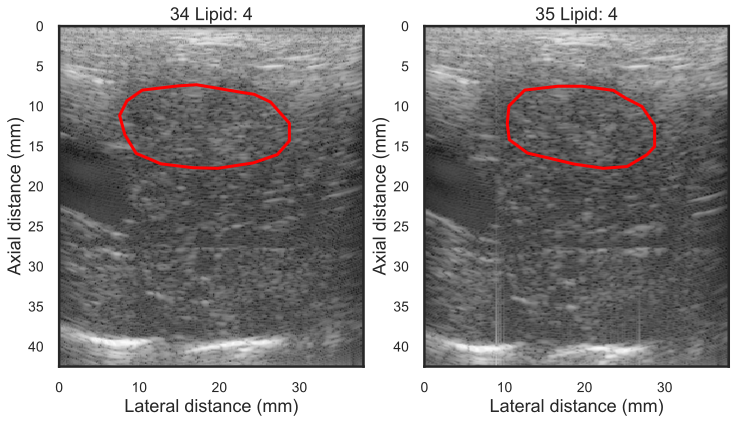

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


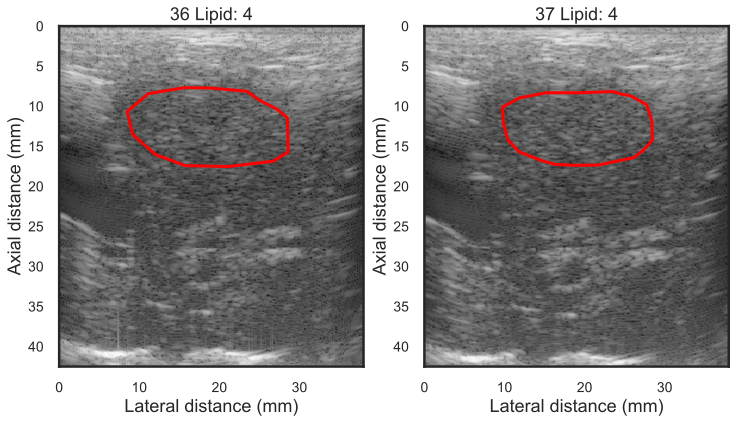

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


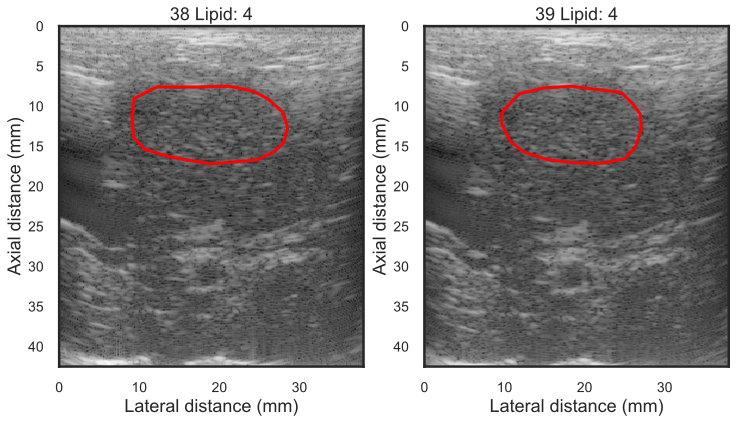

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


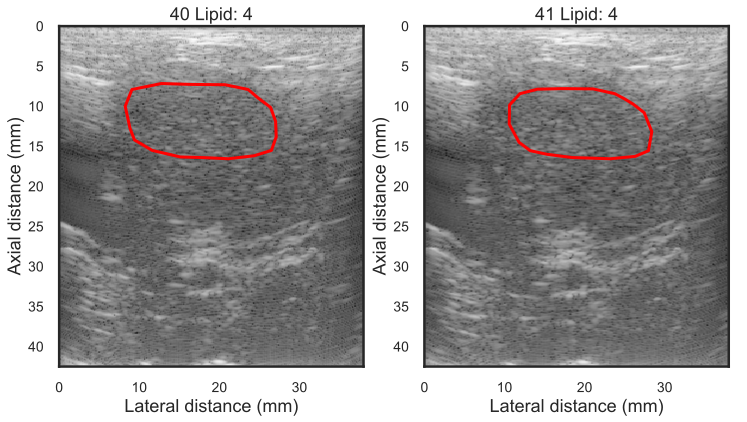

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


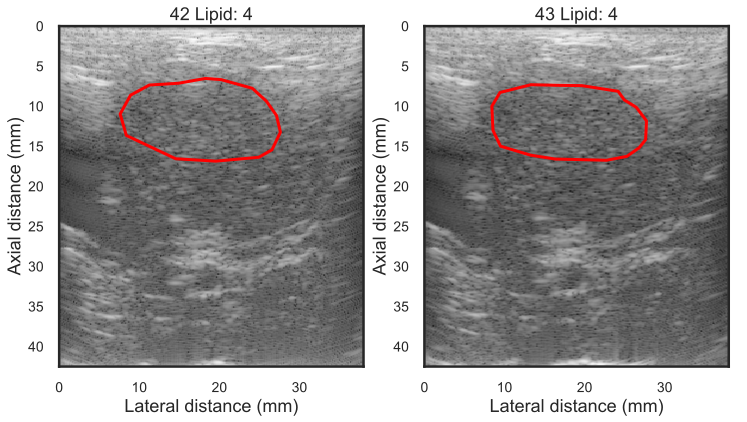

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


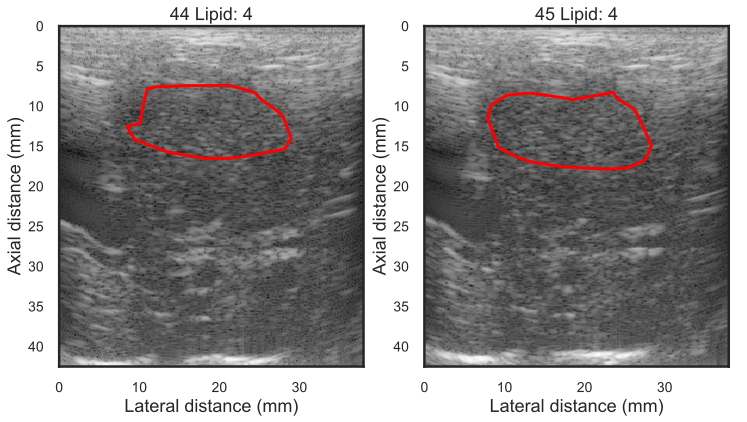

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


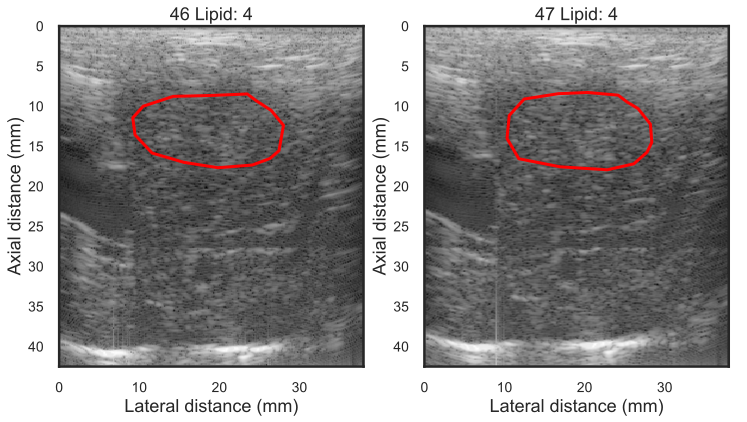

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


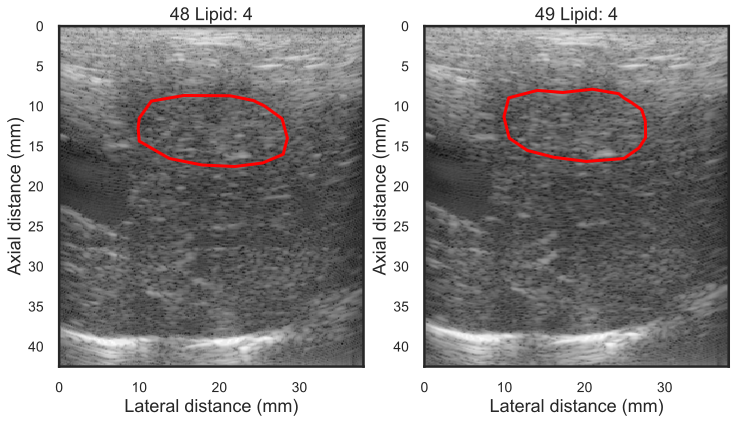

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L751/L94_right/segment_points/L751_L9_4_right_segment_points_51.mat'

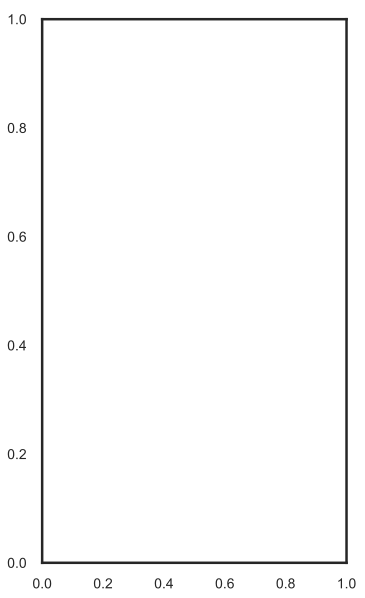

In [38]:
root_path = '/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L'

lipid = dataBase.loc[dataBase.Rabbit == int(number), 'Lipid']
#lipid = lipid.tolist()[0]

lipid = 4
#frame_list  = list(ATTs_dict[number].keys())
frame_list = np.arange(1, 100)
count = 0
for idx in range(0, int(len(frame_list)/2)):

    fig = plt.figure(figsize = (12, 10))
    ax1 = fig.add_subplot(121)
       
    frameNumber = int(frame_list[count]) - 1
    #path = root_path + number +'/RF/newSegmentPoints/'
    
    #path = root_path + number + '/L94_left/segment_points/'
    path = root_path + number + '/L94_right/segment_points/'
    segmentPoints = extract_segment_points(path, frameNumber)
    
    hf = h5py.File(rf_path + number + '.h5', 'r')
    #gp = hf.get('L94/Left')
    gp = hf.get('L94/Right')
    
    image = np.array(gp.get(str(frameNumber)))
    
    envIm = envDetection(image) # the envelope image
        
    ax1.imshow(np.flipud(envIm), vmax = 0, vmin = -80, extent = extent, \
                  aspect = 1,  cmap=plt.cm.gray)

    ax1.invert_yaxis()
    ax1.set_title(str(frameNumber) + ' Lipid: '+ str(lipid))
    ax1.set_xlabel('Lateral distance (mm)')
    ax1.set_ylabel('Axial distance (mm)')
    line = Line2D(segmentPoints[0,:], segmentPoints[1,:], color = 'r', linewidth = '3')    
    ax1.add_line(line)
    hf.close()
    
    count = count + 1
    ax2 = fig.add_subplot(122)
       
    frameNumber = int(frame_list[count]) - 1
    #path = root_path+number+'/RF/newSegmentPoints/'
    segmentPoints = extract_segment_points(path, frameNumber)
    
    hf = h5py.File(rf_path + number + '.h5', 'r')
    #gp = hf.get('L94/Left')
    gp = hf.get('L94/Right')
    image = np.array(gp.get(str(frameNumber)))
    
    envIm = envDetection(image) # the envelope image
        
    ax2.imshow(np.flipud(envIm), vmax = 0, vmin = -80, extent = extent, \
                  aspect = 1,  cmap=plt.cm.gray)

    ax2.invert_yaxis()
    ax2.set_title(str(frameNumber) + ' Lipid: '+ str(lipid))
    ax2.set_xlabel('Lateral distance (mm)')
    ax2.set_ylabel('Axial distance (mm)')
    line = Line2D(segmentPoints[0,:], segmentPoints[1,:], color = 'r', linewidth = '3')    
    ax2.add_line(line)
    hf.close()
    count = count + 1
    plt.show()

In [14]:
lipid

Series([], Name: Lipid, dtype: float64)